In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO

from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
genomic = './sars_cov2_spike_aligned/sars_cov2_spike_aligned.fasta'
report = './sars_cov2_spike/sars_cov2_spike.csv'
sequences = {}
for seq_record in tqdm(SeqIO.parse(genomic, 'fasta')):
    if len(seq_record.seq) == 3822 and (set(seq_record.seq)<=set(['A','T','C','G','-','N','n'])):
        sequences[seq_record.id] = seq_record.seq

df = pd.read_csv(report)
df = df[df.Accession.isin(sequences.keys())]
df = df.sort_values(by='ReleaseDate', ascending=True)

print(df.head())

110625it [00:39, 2802.93it/s]


     Accession ReleaseDate PangoClass                    Location  Length  \
0  NC_045512.2  2020-01-13          B                       China   29903   
1   MW422255.1  2020-12-30      alpha  USA: San Diego, California   29763   
2   MW422256.1  2020-12-30      alpha                         USA   29817   
3   MW430966.1  2021-01-04      alpha             USA: California   29835   
4   MW430974.1  2021-01-04      alpha                USA: Florida   29861   

  Gene               Protein  Begin    End  CDS_Length  
0    S  surface glycoprotein  21563  25384        3822  
1    S  surface glycoprotein  21500  25312        3813  
2    S  surface glycoprotein  21524  25336        3813  
3    S  surface glycoprotein  21523  25335        3813  
4    S  surface glycoprotein  21551  25363        3813  


In [4]:
accession_list = df.Accession.tolist()
accession_list.remove('NC_045512.2')
len_acc = len(accession_list)


In [24]:
x = []
y = []
colors = []
refseq = sequences['NC_045512.2']

for i in tqdm(range(len_acc)):
    acc = accession_list[i]
    seq = sequences[acc]
    var = df[df.Accession==acc].PangoClass.item()
    if(var=="alpha"):
        #c = "blue"
        continue
    elif(var=="Beta"):
        c = "red"
    elif(var=="Delta"):
        c = "green"
    elif(var=="Gamma"):
        c = "purple"
    elif(var=="Lambda"):
        c = "yellow"
    for j in range(3822):
        if(seq[j]!=refseq[j]):
            x.append(j)
            y.append(i)
            colors.append(c)

100%|██████████| 109287/109287 [07:08<00:00, 255.00it/s]


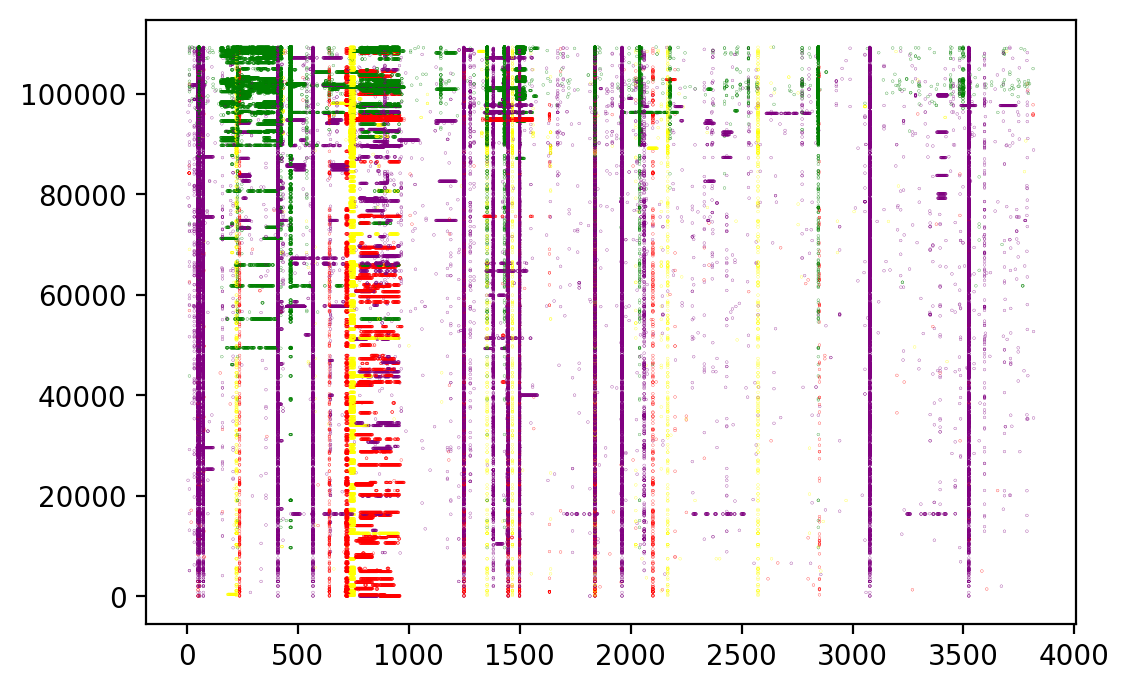

In [25]:
#print(stat)

f = plt.figure(dpi=200)
plt.scatter(x,y, s=0.01, c=colors)
plt.show()
